<h1>KDD<h1>

<h2>Pré-Processamento<h2>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(
 'diabetes.csv',
 true_values=('Yes', 'Positive', 'Male'),
 false_values=('No', 'Negative', 'Female'),
 dtype=int
)

In [4]:
df[['Age']] = StandardScaler().fit_transform(df[['Age']])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('class',axis = 1)
y = df['class']
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [5]:
#melhores features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']
print(featureScores.nlargest(5,'Score'))  

              Atributo       Score
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637


In [6]:
#checando correlação
corr_number = 0.5
for attr in X:
    for att in X:
        if attr == att: continue
        r = np.corrcoef(X[attr],X[att])
        if r[0][1] > corr_number:
            print(f'{att} {attr}')

Polydipsia Polyuria
Polyuria Polydipsia


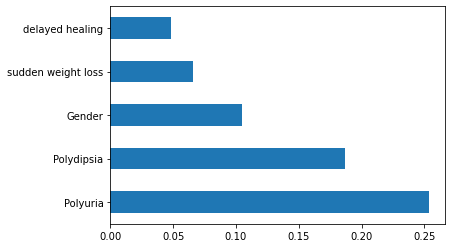

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

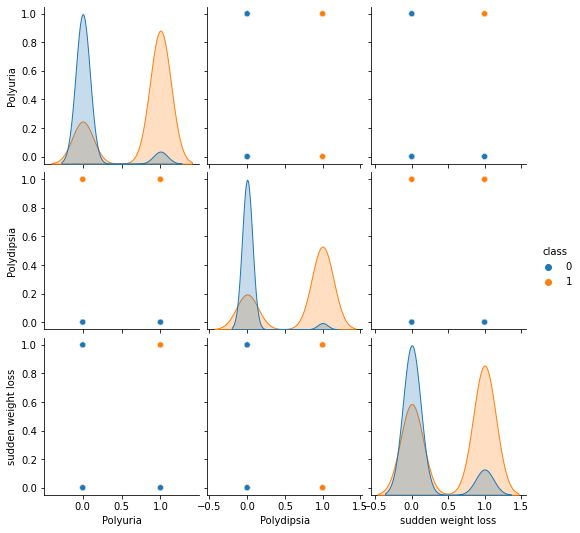

In [8]:
import seaborn as sns
bases_medias = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'class']]

sns.pairplot(bases_medias, hue='class')

<AxesSubplot:>

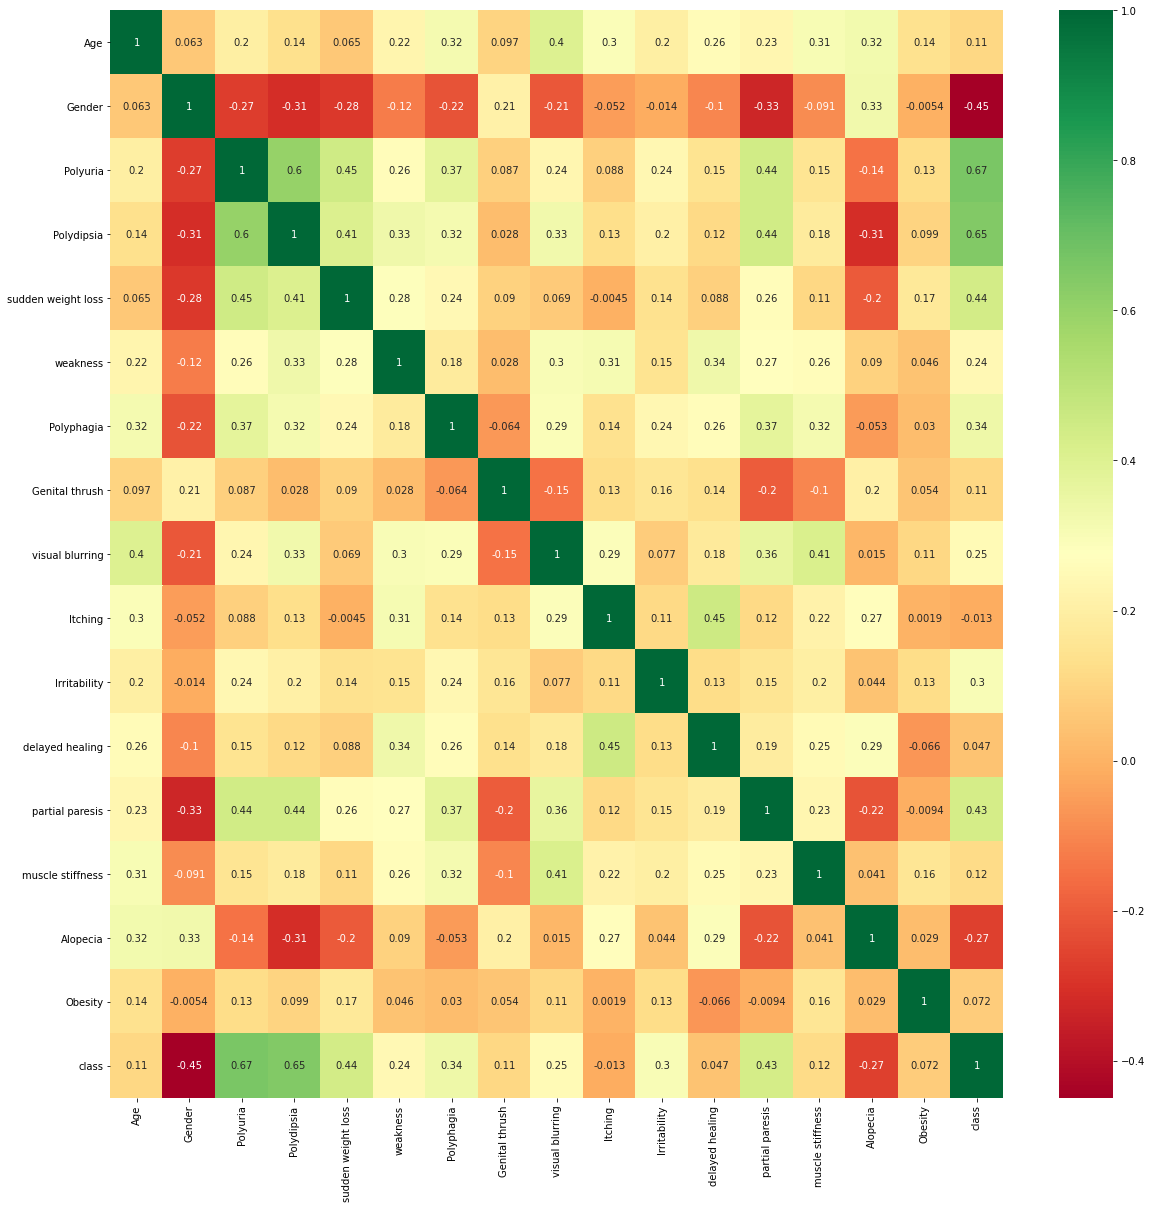

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
df = df.drop(['Polydipsia','sudden weight loss'],axis = 1) # a acurácia aumentou

In [11]:
y = df['class']
X = df.drop(['class'], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split

<h2>Mineração<h2>

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

In [14]:
def decisionTree(X, y, n, amb):
    metrics = []
    t = time.time()
    for i in range(n):
        dt = DecisionTreeClassifier(random_state = 0, criterion = 'gini')
        if amb == 'all':
            dt.fit(X,y)
            y_pred = dt.predict(X)
            tn, fp, fn, tp= confusion_matrix(y,y_pred).ravel()
        else:
            X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3)
            dt.fit(X_train,y_train)
            if amb == 'test':
                y_pred = dt.predict(X_test)
                tn, fp, fn, tp= confusion_matrix(y_test,y_pred).ravel()
            elif amb == 'train':
                y_pred = dt.predict(X_train)
                tn, fp, fn, tp= confusion_matrix(y_train,y_pred).ravel()
        metrics.append({
            'Confiabilidade positiva': tp / (tp + fp),
            'Confiabilidade negativa': tn / (tn + fn),
            'Sensibilidade': tp / (tp + fn),
            'Especificidade': tn / (fp + tn),
            'Acurácia total': (tp + tn) / (tp + fn + fp + tn)
        })
                
    print(f'Finished after {time.time() - t:.2f} seconds')
    
    return pd.DataFrame(metrics)

<h2>Base inteira</h2>

In [15]:
df_all = decisionTree(X,y,10,'all')
df_all

Finished after 0.06 seconds


,Confiabilidade positiva,Confiabilidade negativa,Sensibilidade,Especificidade,Acurácia total
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0


In [16]:
df_all['Acurácia total'].mean() * 100, df_all['Acurácia total'].std() * 100

(100.0, 0.0)

<h2>Treino</h2>

In [17]:
df_train = decisionTree(X,y,10,'train')
df_train

Finished after 0.06 seconds


,Confiabilidade positiva,Confiabilidade negativa,Sensibilidade,Especificidade,Acurácia total
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0


In [18]:
df_train['Acurácia total'].mean() * 100, df_train['Acurácia total'].std() * 100

(100.0, 0.0)

<h2>Teste</h2>

In [22]:
df_test = decisionTree(X,y,10,'test')
df_test

Finished after 0.06 seconds


,Confiabilidade positiva,Confiabilidade negativa,Sensibilidade,Especificidade,Acurácia total
0,0.932584,0.925373,0.943182,0.911765,0.929487
1,0.989362,0.967742,0.978947,0.983607,0.980769
2,0.967391,0.937500,0.956989,0.952381,0.955128
3,1.000000,0.927536,0.945652,1.000000,0.967949
4,0.977273,0.941176,0.955556,0.969697,0.961538
5,0.978495,0.888889,0.928571,0.965517,0.942308
6,0.978495,0.968254,0.978495,0.968254,0.974359
7,0.956522,0.953125,0.967033,0.938462,0.955128
8,0.968085,0.903226,0.938144,0.949153,0.942308
9,0.969388,0.948276,0.969388,0.948276,0.961538


In [23]:
df_test['Acurácia total'].mean() * 100, df_test['Acurácia total'].std() * 100

(95.7051282051282, 1.571638935763528)